<a href="https://colab.research.google.com/github/iamtatha/Data_Science/blob/master/stock_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
def price(df):
  # importing needed libraries
  import math
  import pandas_datareader as web
  import numpy as np
  import pandas as pd
  from sklearn.preprocessing import MinMaxScaler
  from keras.models import Sequential
  from keras.layers import  LSTM
  from keras.layers import Dense
  import matplotlib.pyplot as plt
  plt.style.use('dark_background')

  df=df.dropna()

  # modify the data
  data = df.filter(['Close'])
  dataset = data.values
  training_data_len = math.ceil(len(dataset)*0.8)
  print(training_data_len)
  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data = scaler.fit_transform(dataset)
  scaled_data
  train_data = scaled_data[0:training_data_len, : ]
  x_train = []
  y_train = []

  input_days = 75
  pred_day = 0

  for i in range( 1000+ input_days ,len(train_data) - pred_day):
    x_train.append(train_data[ i - input_days : i , 0 ])
    y_train.append(train_data[ i + pred_day , 0 ])

  x_train = np.array(x_train)
  y_train = np.array(y_train)
  x_train = np.reshape(x_train , ( x_train.shape[0] , x_train.shape[1] , 1 ))

  from keras.layers.advanced_activations import LeakyReLU
  model = Sequential()
  model.add( LSTM( 70, return_sequences = True, input_shape=(x_train.shape[1], 1 )) )
  model.add( LSTM( 70, return_sequences = False ) )
  model.add( Dense(30) )
  model.add( Dense(1) )
  #model.add(Dense(800,input_shape=(num_inputs,)))
  #model.add(LeakyReLU(alpha=0.1))
  model.compile(  loss='mean_squared_error', optimizer='adam' )
  model.fit(x_train, y_train, batch_size=1, epochs=1)

  test_data = scaled_data[training_data_len - input_days: , :]
  x_test =[]
  y_test = dataset[training_data_len: , :]
  for i in range( input_days , len(test_data)):
    x_test.append(test_data[i - input_days :i, 0])
  x_test = np.array(x_test)
  x_test =np.reshape( x_test , ( x_test.shape[0], x_test.shape[1] ,1 ))

  days = int(input())

  predicted = []

  for i in range(days-len(dataset)):
    x = dataset[-input_days+i , :]
    if i>0:
      x.append(pred)
    pred = model.predict(x)
    #pred = scaler.inverse_transform(pred)
    predicted.append(pred)

  print(predicted)


In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd 
df = pd.read_csv('gdrive/My Drive/Stocks/TCS/TCS.csv')

In [5]:
# importing needed libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import  LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt
plt.style.use('dark_background')

df=df.dropna()

# modify the data
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*0.8)
print(training_data_len)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data
train_data = scaled_data[0:training_data_len, : ]
x_train = []
y_train = []

input_days = 75
pred_day = 0

for i in range( 1000+ input_days ,len(train_data) - pred_day):
  x_train.append(train_data[ i - input_days : i , 0 ])
  y_train.append(train_data[ i + pred_day , 0 ])

x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = np.reshape(x_train , ( x_train.shape[0] , x_train.shape[1] , 1 ))

from keras.layers.advanced_activations import LeakyReLU
model = Sequential()
model.add( LSTM( 70, return_sequences = True, input_shape=(x_train.shape[1], 1 )) )
model.add( LSTM( 70, return_sequences = False ) )
model.add( Dense(30) )
model.add( Dense(1) )
#model.add(Dense(800,input_shape=(num_inputs,)))
#model.add(LeakyReLU(alpha=0.1))
model.compile(  loss='mean_squared_error', optimizer='adam' )
model.fit(x_train, y_train, batch_size=1, epochs=2)

test_data = scaled_data[training_data_len - input_days: , :]
x_test =[]
y_test = dataset[training_data_len: , :]
for i in range( input_days , len(test_data)):
  x_test.append(test_data[i - input_days :i, 0])
x_test = np.array(x_test)
x_test =np.reshape( x_test , ( x_test.shape[0], x_test.shape[1] ,1 ))



3108
Epoch 1/2
2033/2033 [==============================] - 108s 53ms/step - loss: 7.3969e-04
Epoch 2/2
2033/2033 [==============================] - 104s 51ms/step - loss: 2.6898e-04


In [39]:
#days = int(input())
days = 3894
predicted = []
print(dataset[-input_days: , :])

for i in range(days-len(dataset)):
  x = dataset[-input_days+i: , :]
  #print(len(x))
  #print(x)
  if i>0:
    #print(len(x))
    x = list(x)+predicted
    #x.append(pred[0])
    #print(len(x),pred[0])
  x_test = np.array(x)
  #print(x_test.shape[0])
  x_test =np.reshape( x_test , ( x_test.shape[1], x_test.shape[0] ,1 ))
  #print(x_test.shape)
  pred = model.predict(x_test)
  print(pred)
  #pred = scaler.inverse_transform(pred)
  predicted.append(pred)

print(predicted)


[[2184.199951]
 [2203.25    ]
 [2215.75    ]
 [2196.350098]
 [2156.800049]
 [2115.350098]
 [2156.149902]
 [2123.600098]
 [2105.5     ]
 [2000.150024]
 [2001.300049]
 [2036.199951]
 [2083.199951]
 [2125.050049]
 [2116.449951]
 [1972.349976]
 [1953.699951]
 [1769.849976]
 [1806.300049]
 [1696.400024]
 [1658.      ]
 [1654.400024]
 [1636.349976]
 [1797.449951]
 [1669.699951]
 [1703.150024]
 [1750.300049]
 [1790.949951]
 [1824.5     ]
 [1778.5     ]
 [1826.099976]
 [1708.75    ]
 [1654.199951]
 [1775.199951]
 [1705.449951]
 [1766.150024]
 [1759.25    ]
 [1735.150024]
 [1716.050049]
 [1806.199951]
 [1818.650024]
 [1737.650024]
 [1769.5     ]
 [1878.25    ]
 [1818.550049]
 [1836.599976]
 [1859.050049]
 [1905.650024]
 [2014.449951]
 [1930.449951]
 [1932.75    ]
 [1903.599976]
 [1891.650024]
 [1893.400024]
 [1935.300049]
 [1949.5     ]
 [1949.650024]
 [1902.349976]
 [1892.900024]
 [1945.599976]
 [1948.650024]
 [1953.599976]
 [1991.199951]
 [2020.349976]
 [1943.      ]
 [2005.300049]
 [2004.300

In [31]:
pred = scaler.inverse_transform(predicted)

ValueError: ignored

In [0]:
pred = []
for i in predicted:
  pred.append(i[0])

In [33]:
pred

[array([4.8211975], dtype=float32),
 array([4.301313], dtype=float32),
 array([4.066998], dtype=float32),
 array([3.891535], dtype=float32),
 array([3.7648766], dtype=float32),
 array([3.6741605], dtype=float32),
 array([3.610642], dtype=float32),
 array([3.5673661], dtype=float32),
 array([3.534344], dtype=float32),
 array([3.4874744], dtype=float32)]

In [0]:
pred = list(pred)

In [35]:
pred

[array([4.8211975], dtype=float32),
 array([4.301313], dtype=float32),
 array([4.066998], dtype=float32),
 array([3.891535], dtype=float32),
 array([3.7648766], dtype=float32),
 array([3.6741605], dtype=float32),
 array([3.610642], dtype=float32),
 array([3.5673661], dtype=float32),
 array([3.534344], dtype=float32),
 array([3.4874744], dtype=float32)]

In [36]:
type(pred)

list

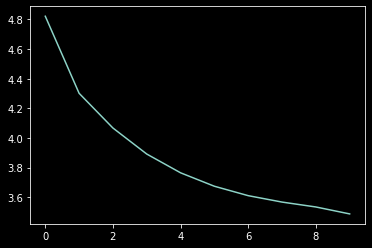

In [37]:
plt.plot(pred)

In [42]:
model.predict(np.reshape(dataset[-input_days+i: , :]),(dataset[-input_days+i: , :]).shape[0], dataset[-input_days+i: , :]).shape[1], 1))

SyntaxError: ignored